# Import Necessary Libraries

In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind



# Load & Explore the Data

In [3]:
df = pd.read_csv('/Users/jshn/Desktop/UPTRAIL INTERNSHIP/Week3/streamworks_user_data.csv')

In [7]:
# Using pands to read the CSV file
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [8]:
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [9]:
df.value_counts()

user_id  age   gender  signup_date  last_active_date  country  subscription_type  average_watch_hours  mobile_app_usage_pct  complaints_raised  received_promotions  referred_by_friend  is_churned  monthly_fee
1001.0   56.0  Other   02-04-25     13-07-25          France   Standard           42.6                 77.4                  1.0                No                   No                  1.0         10.99          1
2014.0   42.0  Female  29-08-24     13-07-25          India    Premium            30.0                 83.3                  2.0                No                   Yes                 0.0         13.99          1
2012.0   43.0  Other   30-03-24     13-07-25          France   Premium            59.0                 50.4                  3.0                No                   No                  0.0         13.99          1
2011.0   39.0  Female  04-07-25     13-07-25          France   Standard           10.2                 94.0                  5.0                No   

In [10]:
df.isnull().sum()

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

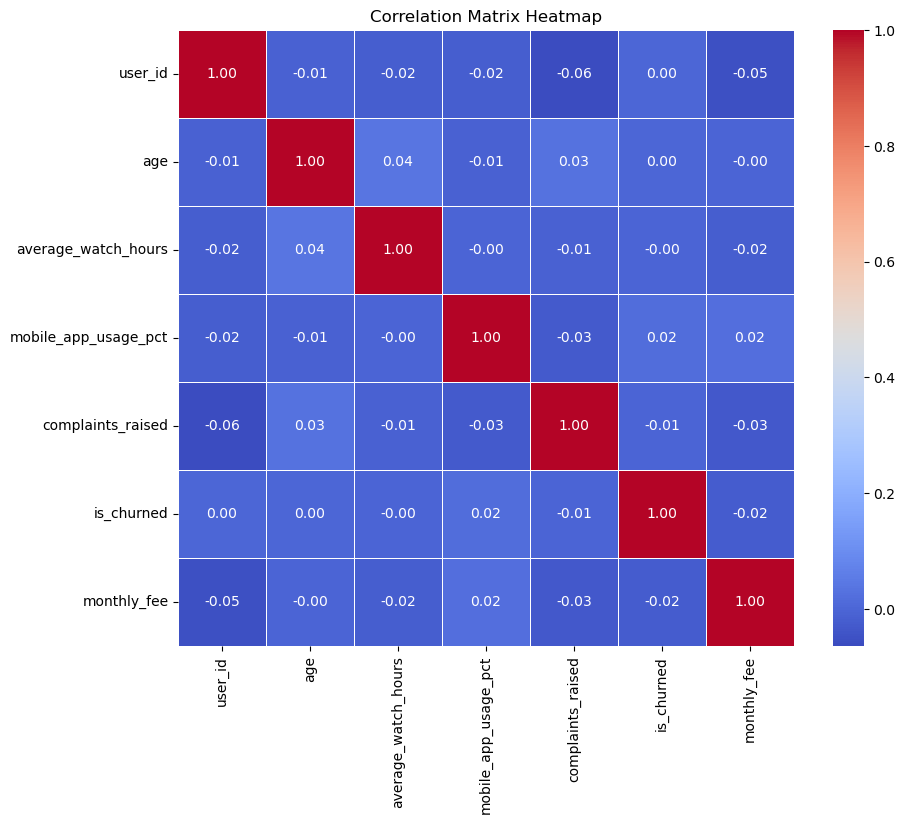

In [12]:
# Create a correlation matrix and heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Clean & Prepare the Data

In [40]:
# Convert signup_date, last_active_data to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'], format="%d-%m-%Y", errors='coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], format="%d-%m-%Y", errors='coerce')
print(df.head())

   user_id   age  gender signup_date last_active_date  country  \
0   1001.0  56.0       2  2025-02-04       2025-07-13        1   
1   1002.0  69.0       1  2023-02-01       2025-07-13        3   
2   1003.0  46.0       1  2022-08-21       2025-07-13        4   
3   1004.0  32.0       2  2023-09-14       2025-07-13        2   
4   1005.0  60.0       0  2023-07-29       2025-07-13        3   

   subscription_type  average_watch_hours  mobile_app_usage_pct  \
0                  2                 42.6                  77.4   
1                  0                 65.3                  98.0   
2                  1                 40.1                  47.8   
3                  1                  5.8                  53.2   
4                  2                 32.7                  16.8   

   complaints_raised  received_promotions  referred_by_friend  is_churned  \
0                1.0                    0                   0         1.0   
1                4.0                    0     

In [52]:
# Create New Features

# Tenure_days
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# Define is_loyal based on tenure_days > 180
df['is_loyal'] = df['tenure_days'] > 180

# Watch per ratio (average hours watched per tenure day)
df["watch_per_ratio"] = df["average_watch_hours"] / df["tenure_days"]

# Feature 2: Heavy mobile user (1 if >70% usage, else 0)
df["heavy_mobile_user"] = (df["mobile_app_usage_pct"] > 70).astype(int)

# Define low watch time (below median)
watch_median = df["average_watch_hours"].median()
df["low_watch_time"] = (df["average_watch_hours"] < watch_median).astype(int)

# Interaction feature: received promotion AND low watch time
df["promo_and_low_watch"] = ((df["received_promotions"] == 1) & 
                             (df["low_watch_time"] == 1)).astype(int)

print(df.head())

   user_id   age  gender signup_date last_active_date  country  \
0   1001.0  56.0       2  2025-02-04       2025-07-13        1   
1   1002.0  69.0       1  2023-02-01       2025-07-13        3   
2   1003.0  46.0       1  2022-08-21       2025-07-13        4   
3   1004.0  32.0       2  2023-09-14       2025-07-13        2   
4   1005.0  60.0       0  2023-07-29       2025-07-13        3   

   subscription_type  average_watch_hours  mobile_app_usage_pct  \
0                  2                 42.6                  77.4   
1                  0                 65.3                  98.0   
2                  1                 40.1                  47.8   
3                  1                  5.8                  53.2   
4                  2                 32.7                  16.8   

   complaints_raised  received_promotions  referred_by_friend  is_churned  \
0                1.0                    0                   0         1.0   
1                4.0                    0     

In [ ]:
# Apply LabelEncoder to each categorical columns
label_encoder = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoder[column] = le

# dummies 
df_encoded = pd.get_dummies(df, drop_first=True)

print(df)

      user_id   age  gender signup_date last_active_date  country  \
0      1001.0  56.0       2  2025-02-04       2025-07-13        1   
1      1002.0  69.0       1  2023-02-01       2025-07-13        3   
2      1003.0  46.0       1  2022-08-21       2025-07-13        4   
3      1004.0  32.0       2  2023-09-14       2025-07-13        2   
4      1005.0  60.0       0  2023-07-29       2025-07-13        3   
...       ...   ...     ...         ...              ...      ...   
1488   2496.0  40.0       0  2023-11-26       2025-07-13        0   
1489   2497.0  54.0       1  2025-12-02       2025-07-13        5   
1490   2498.0  28.0       2  2023-01-03       2025-07-13        4   
1491   2499.0  23.0       0  2022-10-24       2025-07-13        5   
1492   2500.0  35.0       2  2023-01-26       2025-07-13        0   

      subscription_type  average_watch_hours  mobile_app_usage_pct  \
0                     2                 42.6                  77.4   
1                     0        

In [ ]:
# Fill Missing Values
# Drop rows with critical missing values 
df = df.dropna(subset=["user_id", "signup_date", "last_active_date", "is_churned"]).copy()

# Fill numerical columns 
df["age"] = df["age"].fillna(df["age"].median())
df["average_watch_hours"] = df["average_watch_hours"].fillna(df["average_watch_hours"].median())
df["mobile_app_usage_pct"] = df["mobile_app_usage_pct"].fillna(df["mobile_app_usage_pct"].median())
df["complaints_raised"] = df["complaints_raised"].fillna(0)

# Fill monthly_fee with median per subscription_type
df["monthly_fee"] = df.groupby("subscription_type")["monthly_fee"]\
                      .transform(lambda x: x.fillna(x.median()))

# tenure_days: recalc if possible, else fill with median
df["tenure_days"] = df["tenure_days"].fillna(
    (df["last_active_date"] - df["signup_date"]).dt.days
)
df["tenure_days"] = df["tenure_days"].fillna(df["tenure_days"].median())

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Check result
print(df.isnull().sum())



user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
watch_per_ratio         0
heavy_mobile_user       0
low_watch_time          0
promo_and_low_watch     0
dtype: int64


In [55]:
print(df.head())

   user_id   age  gender signup_date last_active_date  country  \
0   1001.0  56.0       2  2025-02-04       2025-07-13        1   
1   1002.0  69.0       1  2023-02-01       2025-07-13        3   
2   1003.0  46.0       1  2022-08-21       2025-07-13        4   
3   1004.0  32.0       2  2023-09-14       2025-07-13        2   
4   1005.0  60.0       0  2023-07-29       2025-07-13        3   

   subscription_type  average_watch_hours  mobile_app_usage_pct  \
0                  2                 42.6                  77.4   
1                  0                 65.3                  98.0   
2                  1                 40.1                  47.8   
3                  1                  5.8                  53.2   
4                  2                 32.7                  16.8   

   complaints_raised  received_promotions  referred_by_friend  is_churned  \
0                1.0                    0                   0         1.0   
1                4.0                    0     

# Statistical Analysis & Insights 

In [59]:
# Using Chi-Squared Test for Categorical Features
def chi_square_test(df, col, target="is_churned"):
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return {
        "feature": col,
        "chi2": chi2,
        "p_value": p,
        "degrees_of_freedom": dof,
        "significant": p < 0.05
    }

# Run tests
results = []
for col in ["gender", "received_promotions", "referred_by_friend"]:
    results.append(chi_square_test(df, col))

# Convert to DataFrame for clarity
chi_results = pd.DataFrame(results)
print(chi_results)

               feature       chi2   p_value  degrees_of_freedom  significant
0               gender   4.462637  0.107387                   2        False
1  received_promotions  12.148069  0.002302                   2         True
2   referred_by_friend   1.259159  0.532816                   2        False


In [61]:
# Statistical Analysis: T-test for Average Watch Hours

# Split data into churned vs retained
churned = df[df["is_churned"] == 1]["average_watch_hours"]
retained = df[df["is_churned"] == 0]["average_watch_hours"]

# Perform independent samples t-test
t_stat, p_value = ttest_ind(churned, retained, equal_var=False)  

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("✅ Significant difference: churned and retained users have different watch times.")
else:
    print("❌ No significant difference: watch time is similar between churned and retained users.")


T-statistic: -0.14600709892499122
P-value: 0.8839677034293572
❌ No significant difference: watch time is similar between churned and retained users.


is_churned              1.000000
mobile_app_usage_pct    0.018346
heavy_mobile_user       0.013768
country                 0.011947
subscription_type       0.005217
age                     0.001947
user_id                -0.000361
low_watch_time         -0.000584
tenure_days            -0.001086
average_watch_hours    -0.003813
complaints_raised      -0.007724
monthly_fee            -0.019833
referred_by_friend     -0.022950
watch_per_ratio        -0.025863
received_promotions    -0.027617
gender                 -0.047338
promo_and_low_watch    -0.048692
Name: is_churned, dtype: float64


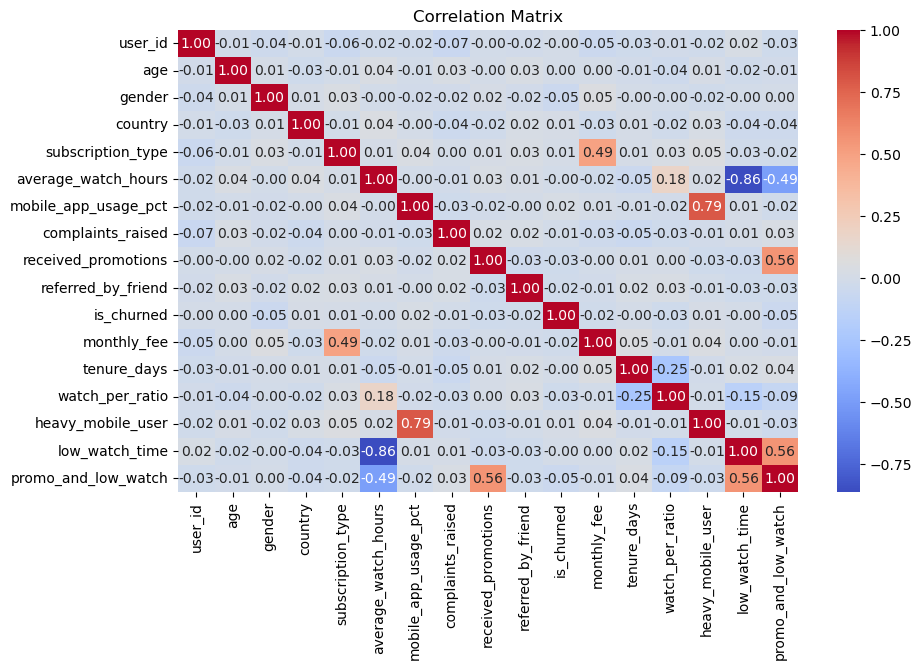

In [62]:
# Correlation Analysis
# Select numeric features
num_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr_matrix = num_df.corr()

# Print correlations with churn
print(corr_matrix["is_churned"].sort_values(ascending=False))

# --- Heatmap visualization ---
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

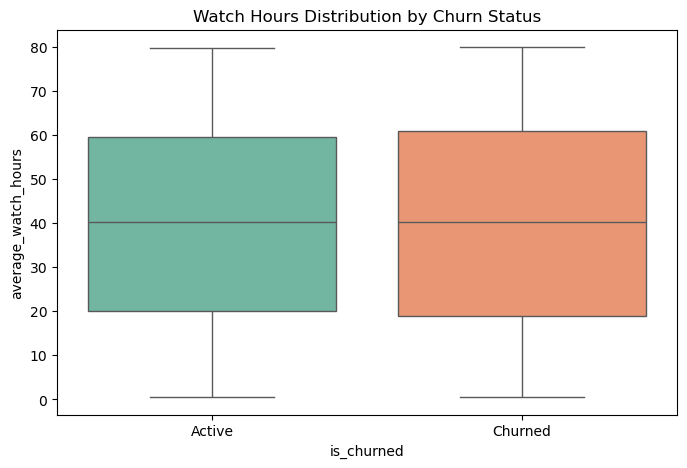

In [64]:
# Boxplot between churn and active users 

plt.figure(figsize=(8,5))
# Assign hue to avoid FutureWarning
sns.boxplot(x="is_churned", y="average_watch_hours", hue="is_churned", data=df, legend=False, palette="Set2")
plt.xticks([0,1], ["Active", "Churned"])
plt.title("Watch Hours Distribution by Churn Status")
plt.show()

/var/folders/8c/f33hbs394s3b3wd1k7v6ywc40000gn/T/ipykernel_33845/1874673776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y="average_watch_hours", data=df, palette="Set2")


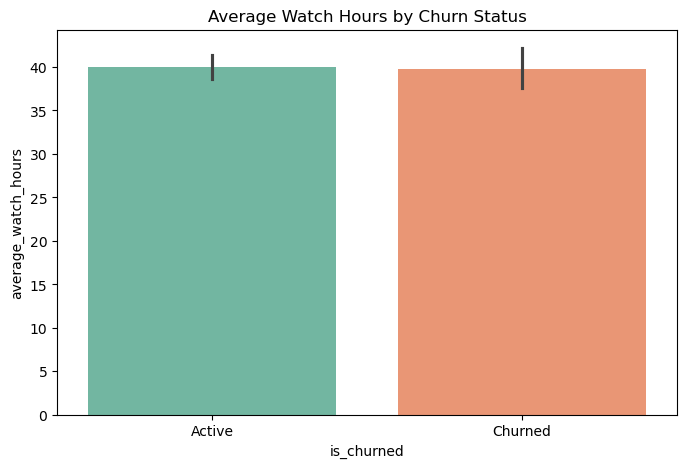

In [67]:
# Bar plot between churn and active users
plt.figure(figsize=(8,5))
sns.barplot(x="is_churned", y="average_watch_hours", data=df, palette="Set2")
plt.xticks([0,1], ["Active", "Churned"])
plt.title("Average Watch Hours by Churn Status")
plt.show()

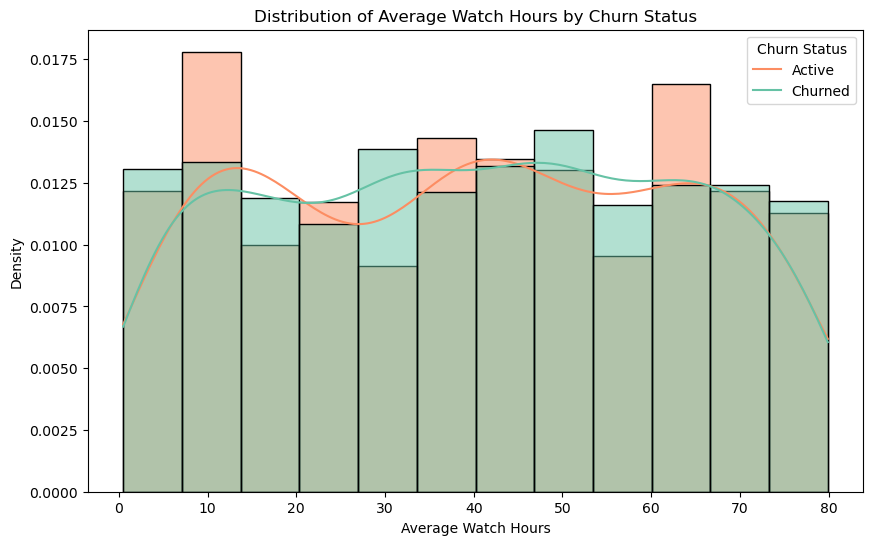

In [68]:
# Histogram plot between churn and active users
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="average_watch_hours", hue="is_churned", kde=30, stat="density", common_norm=False, palette="Set2")
plt.title("Distribution of Average Watch Hours by Churn Status")
plt.xlabel("Average Watch Hours")
plt.ylabel("Density")
plt.legend(title="Churn Status", labels=["Active", "Churned"])
plt.show()


# Predictive Modelling, Logistic Regression

In [73]:
# Logistic Regression Model
# Drop datetime columns from features
datetime_cols = ['signup_date', 'last_active_date']
X = df_encoded.drop(columns=["is_churned"] + [col for col in datetime_cols if col in df_encoded.columns])
y = df_encoded["is_churned"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
# Evaluate model
accuracy = logistic_model.score(X_test_scaled, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
# Predict churn probabilities
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
# Create DataFrame for predictions
predictions_df = pd.DataFrame({df_encoded.index.name: X_test.index, "predicted_churn_prob": y_pred_proba})
# Save predictions to CSV
predictions_df.to_csv('/Users/jshn/Desktop/UPTRAIL INTERNSHIP/predictions.csv', index=False)

Logistic Regression Accuracy: 0.77


In [88]:
print(predictions_df.head())

   None  predicted_churn_prob
0  1075              0.287629
1   446              0.166245
2   711              0.267477
3  1389              0.292179
4  1178              0.284425


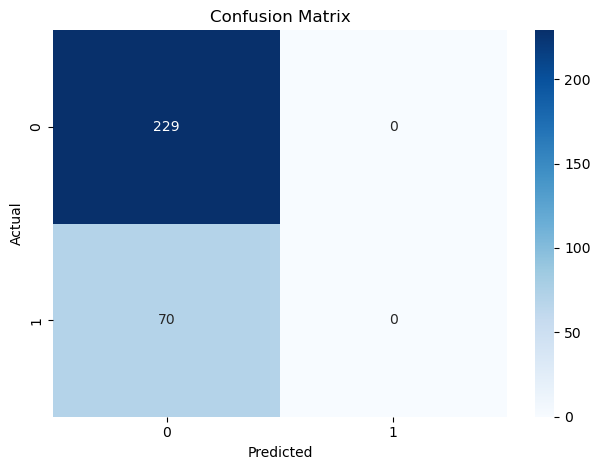

In [76]:
# Evaluate Model Using Confusion Matrix
cm = confusion_matrix(y_test, logistic_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [78]:
# Evaluate Model using Precision, Recall, F1-Score
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)
print(classification_report(y_test, logistic_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       0.78      0.59      0.67       229
         1.0       0.25      0.46      0.32        70

    accuracy                           0.56       299
   macro avg       0.52      0.52      0.50       299
weighted avg       0.66      0.56      0.59       299



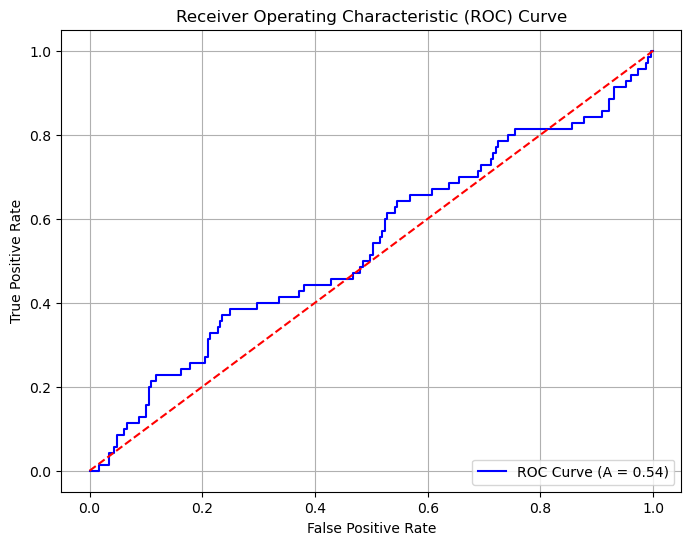

In [81]:
# Evaluate Model Using ROC Curve and AUC
# Get false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (A = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle ='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [85]:
# Interpret model coefficients and identify important features
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logistic_model.coef_[0],
    'importance': np.abs(logistic_model.coef_[0])
})
coefficients = coefficients.sort_values(by='importance', ascending=False)

# Predictors of Churn from the model
important_features = coefficients[coefficients['importance'] > 0.1]
print("Important Features for Churn Prediction:")
print(important_features[['feature', 'importance']])


Important Features for Churn Prediction:
                feature  importance
13      watch_per_ratio    0.177957
16  promo_and_low_watch    0.146312
12             is_loyal    0.136278


# Linear Regression

In [87]:
# Predict average watch hours using Linear Regression from user features
# Define features and target
X_linear = df_encoded.drop(columns=["average_watch_hours", "is_churned"] + [col for col in datetime_cols if col in df_encoded.columns])
y_linear = df_encoded["average_watch_hours"]
# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)
# Scale features
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear_scaled, y_train_linear)
# Evaluate model
linear_accuracy = linear_model.score(X_test_linear_scaled, y_test_linear)
print(f"Linear Regression R^2 Score: {linear_accuracy:.2f}")
# Predict average watch hours
y_pred_linear = linear_model.predict(X_test_linear_scaled)
# Create DataFrame for predictions
predictions_linear_df = pd.DataFrame({
    df_encoded.index.name: X_test_linear.index,
    "predicted_average_watch_hours": y_pred_linear
})

print("Predicted Average Watch Hours:")
print(predictions_linear_df.head())


Linear Regression R^2 Score: 0.71
Predicted Average Watch Hours:
   None  predicted_average_watch_hours
0   949                      59.241396
1   900                      21.591159
2  1339                      58.958415
3   983                      20.532029
4   958                      60.559736


R^2 Score: 0.71, RMSE: 11.93


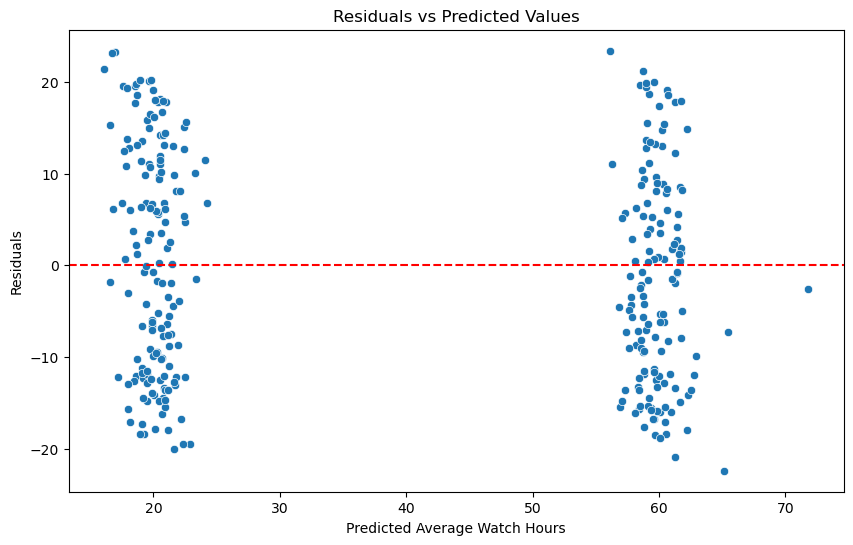

In [91]:
# Evaluaate using R^2, RMSE, residual plots 

r2 = r2_score(y_test_linear, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred_linear))
print(f"R^2 Score: {r2:.2f}, RMSE: { rmse:.2f}")
# Plot residuals
residuals = y_test_linear - y_pred_linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_linear, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Average Watch Hours")
plt.ylabel("Residuals")
plt.show()


In [92]:
# Interpret coefficients for business insights
coefficients_linear = pd.DataFrame({ 
    'feature': X_linear.columns,
    'coefficient': linear_model.coef_,
    'importance': np.abs(linear_model.coef_)
})
coefficients_linear = coefficients_linear.sort_values(by='importance', ascending=False)
print("Linear Regression Coefficients:")
print(coefficients_linear[['feature', 'coefficient', 'importance']])


Linear Regression Coefficients:
                 feature  coefficient  importance
14        low_watch_time   -19.735588   19.735588
12       watch_per_ratio     1.340096    1.340096
10           tenure_days    -1.255218    1.255218
11              is_loyal     1.224008    1.224008
13     heavy_mobile_user     0.772086    0.772086
5   mobile_app_usage_pct    -0.466954    0.466954
8     referred_by_friend    -0.448966    0.448966
1                    age     0.427509    0.427509
3                country     0.420398    0.420398
6      complaints_raised    -0.372860    0.372860
9            monthly_fee    -0.319582    0.319582
7    received_promotions     0.084486    0.084486
15   promo_and_low_watch    -0.047414    0.047414
2                 gender    -0.040423    0.040423
4      subscription_type    -0.035001    0.035001
0                user_id     0.027248    0.027248


# Business Question Answer

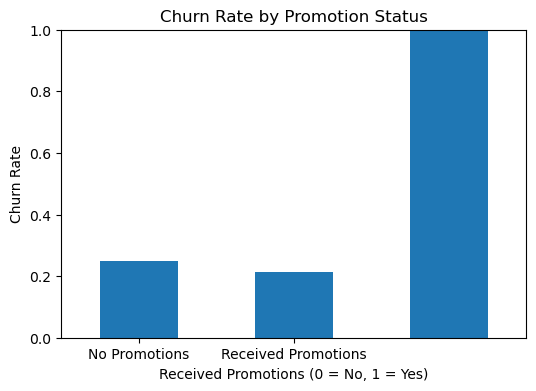

In [93]:
# Group churn rate by promotion status
churn_by_promo = df.groupby("received_promotions")["is_churned"].mean()

# Plot
churn_by_promo.plot(kind="bar", figsize=(6,4))

plt.title("Churn Rate by Promotion Status")
plt.xlabel("Received Promotions (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.xticks([0, 1], ["No Promotions", "Received Promotions"], rotation=0)
plt.ylim(0, 1)  # since churn is a rate (0–1)

plt.show()


In [95]:


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df["received_promotions"], df["is_churned"])

print("Contingency Table:")
print(contingency_table)

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:")
print(expected)


Contingency Table:
is_churned           0.0  1.0
received_promotions          
0                    571  188
1                    574  157
2                      0    3

Chi-square Statistic: 12.148069024839328
Degrees of Freedom: 2
P-value: 0.0023018675381281366

Expected Frequencies:
[[582.08640322 176.91359678]
 [560.61286001 170.38713999]
 [  2.30073677   0.69926323]]


In [97]:
# Build contingency table
contingency_mobile = pd.crosstab(df["heavy_mobile_user"], df["is_churned"])

print("Contingency Table:")
print(contingency_mobile)

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_mobile)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:")
print(expected)


Contingency Table:
is_churned         0.0  1.0
heavy_mobile_user          
0                  784  233
1                  361  115

Chi-square Statistic: 0.21746073378417785
Degrees of Freedom: 1
P-value: 0.6409815605111348

Expected Frequencies:
[[779.94976557 237.05023443]
 [365.05023443 110.94976557]]
